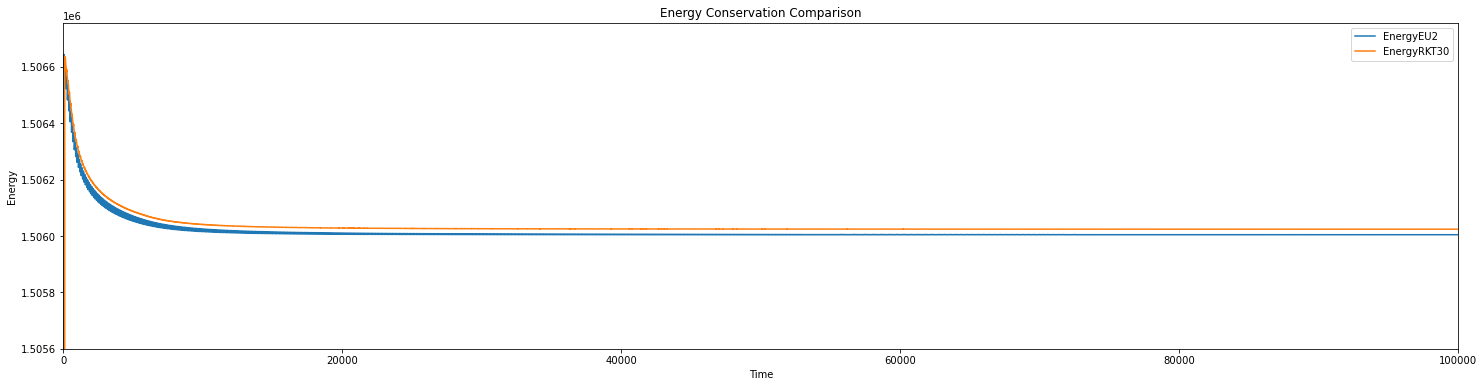

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage ##

#filter
def running_mean(a,WSZ):
	'''
	Smoothes a 1-D numpy array.
	
	WSZ: smoothing window size needs, which must be odd number,
	as in the original MATLAB implementation.

	https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
	'''
	return ndimage.uniform_filter1d(a, WSZ)


#
# Read data from the first file
data1 = np.loadtxt('EnergyEUv3.txt')

# Read data from the second file
data2 = np.loadtxt('EnergyRKT30v2.txt')

# Separate the data from the first file into x1 and y1 arrays
x1 = data1[:, 0]
y1 = data1[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x2 = data2[:, 0]
y2 = data2[:, 1]

# Set the figure size
plt.figure(figsize=(25, 6))  # Adjust the width (15) and height (6) as needed

# Plot the data from the first file
plt.plot(x1, running_mean(y1,811), label='EnergyEU2') #

# Plot the data from the second file
plt.plot(x2, running_mean(y2,811), label='EnergyRKT30') #

plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation Comparison')

# Set the y-axis limits
#plt.ylim(min(y1.min(), y2.min()), max(y1.max(), y2.max()))

#plt.ylim(1505800, 1506206)
plt.ylim(1505600, 1506756)
#plt.xlim(x.min(), x.max())
plt.xlim(0, 100000)

plt.legend()
plt.show()




In [1]:
#!/bin/env python

import os, sys, numpy as np
import matplotlib.pyplot as plt


def stagger(x):
    '''
    Compute x on the staggered mesh
    NEEDS HALOS
    '''
    out = np.zeros_like(x)
    for i in range(x.shape[0]-1):
        out[i] = 0.5*(x[i+1] + x[i])
    out[-1] = out[0]
    return out

def center(x):
    '''
    Compute x on the centered mesh
    NEEDS HALOS
    '''
    out = np.zeros_like(x)
    for i in range(x.shape[0]-1):
        out[i+1] = 0.5*(x[i] + x[i-1])
    out[0] = out[-1]

g  = 9.81
h0 = 10.

INFMT   = 'EnergyRKT30v2.txt'
OUTNAME = 'energy.png'

# Start and end times to process
START = int(sys.argv[1])
END   = int(sys.argv[2])

time  = np.zeros((END+1-START,),np.double)
e_int = np.zeros((END+1-START,),np.double)

for ii,ifile in enumerate(range(START,END+1)):
    # Load data
    file = open(INFMT%ifile,'r')
    # Read the time
    time[ii] = float(file.readline())
    # Read the data
    data = np.genfromtxt(file)
    file.close()
    # Skip halo nodes
    x_h = data[1:-1,0]
    x_u = data[:-1,1]
    u   = data[:-1,2]
    h   = stagger(data[:,3])[:-1]
    # Compute total energy as a function of x
    e = 0.5*(h+h0)*(u*u) + 0.5*g*(h+h0)*(h+h0) #+ g*h0*(h+h0)
    # Compute the integral wrt x
    e_int[ii] = np.trapz(e,x_u)

fig = plt.figure(figsize=(10,5))
plt.plot(time,e_int)
plt.xlabel('time')
plt.ylabel('e')

# Store
fig.savefig(OUTNAME,dpi=300)
plt.show()


ValueError: invalid literal for int() with base 10: '-f'

In [ ]:
#!/usr/bin/env python

import sys
import numpy as np
import matplotlib.pyplot as plt

def stagger(x):
    '''
    Compute x on the staggered mesh
    NEEDS HALOS
    '''
    out = np.zeros_like(x)
    for i in range(x.shape[0]-1):
        out[i] = 0.5 * (x[i+1] + x[i])
    out[-1] = out[0]
    return out

def center(x):
    '''
    Compute x on the centered mesh
    NEEDS HALOS
    '''
    out = np.zeros_like(x)
    for i in range(x.shape[0]-1):
        out[i+1] = 0.5 * (x[i] + x[i-1])
    out[0] = out[-1]
    return out

g = 9.81
h0 = 10.

INFMT = 'EnergyRKT30v2.txt'
OUTNAME = 'energy.png'

# Start and end times to process
START = int(sys.argv[1])
END = int(sys.argv[2])

time = np.zeros((END+1-START,), np.double)
e_int = np.zeros((END+1-START,), np.double)

for ii, ifile in enumerate(range(START, END+1)):
    # Load data
    with open(INFMT, 'r') as file:
        lines = file.readlines()
    # Read the time
    time[ii] = float(lines[0])
    # Read the data
    data = np.genfromtxt(lines[1:])
    # Extract columns
    x = data[:, 0]
    u = data[:, 1]
    h = data[:, 2]
    # Compute total energy as a function of x
    e = 0.5 * (h + h0) * (u * u) + 0.5 * g * (h + h0) * (h + h0)
    # Compute the integral wrt x
    e_int[ii] = np.trapz(e, x)

fig = plt.figure(figsize=(10, 5))
plt.plot(time, e_int)
plt.xlabel('time')
plt.ylabel('e')

# Save the plot
fig.savefig(OUTNAME, dpi=300)
plt.show()


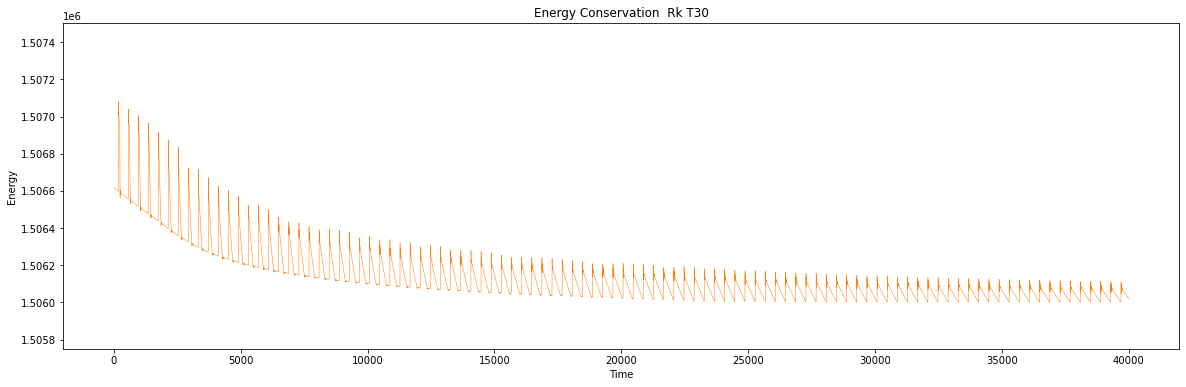

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from the file
data = np.loadtxt('EnergyRK4s12 -T35.txt')

# Generate x values starting from 1
x = np.arange(1, len(data) + 1)

# Set the figure size
plt.figure(figsize=(20, 6))  # Adjust the width (15) and height (6) as needed

# Plot the data
#plt.plot(x, data, marker='o')
plt.plot(x, data, linewidth=0.5)

plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation  Rk T30')

# Set the y-axis limits
plt.ylim(1505750, 1507506)
#plt.xlim(-500, 10000)
#plt.xlim(-500, 100000)
plt.show()

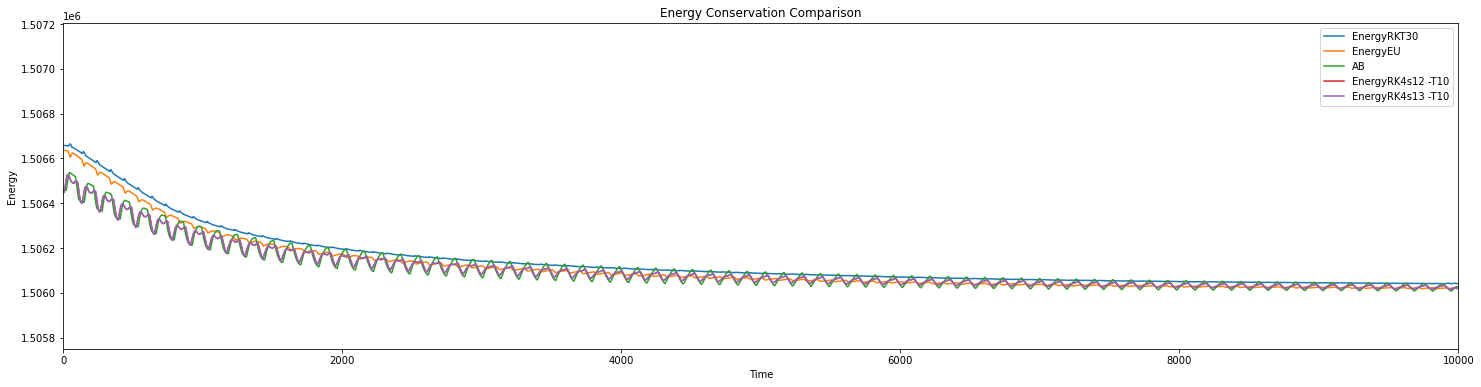

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage ##

#filter
def running_mean(a,WSZ):
	'''
	Smoothes a 1-D numpy array.
	
	WSZ: smoothing window size needs, which must be odd number,
	as in the original MATLAB implementation.

	https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
	'''
	return ndimage.uniform_filter1d(a, WSZ)


#

# Read data from the first file
data2 = np.loadtxt('EnergyEUv4-conInicial.txt')

# Read data from the second file
data1 = np.loadtxt('EnergyRKT30v2-conInicial.txt')

# Read data from the first file
data3 = np.loadtxt('EnergyAB3.txt')

# Read data from the first file
data4 = np.loadtxt('EnergyRK4s12 -T10.txt')

# Read data from the first file
data5 = np.loadtxt('EnergyRK4s13 -T10.txt')


# Separate the data from the first file into x1 and y1 arrays
x1 = data1[:, 0]
y1 = data1[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x2 = data2[:, 0]
y2 = data2[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x3 = data3[1:, 0]
y3 = data3[1:, 1]

# Separate the data from the second file into x2 and y2 arrays
x4 = data3[1:, 0]
y4 = data3[1:, 1]

# Separate the data from the second file into x2 and y2 arrays
x5 = data3[1:, 0]
y5 = data3[1:, 1]

# Set the figure size
plt.figure(figsize=(25, 6))  # Adjust the width (15) and height (6) as needed

# Plot the data from the first file
plt.plot(x1, running_mean(y1,811), label='EnergyRKT30')

# Plot the data from the second file
plt.plot(x2, running_mean(y2,1811), label='EnergyEU')

# Plot the data from the second file
plt.plot(x3, running_mean(y3,6811), label='AB')

# Plot the data from the second file
plt.plot(x4, running_mean(y4,9811), label='EnergyRK4s12 -T10')

# Plot the data from the second file
plt.plot(x5, running_mean(y5,9811), label='EnergyRK4s13 -T10')

plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation Comparison')

# Set the y-axis limits
#plt.ylim(min(y1.min(), y2.min()), max(y1.max(), y2.max()))

plt.ylim(1505750, 1507206)

#plt.xlim(x.min(), x.max())
plt.xlim(0, 10000)

#plt.ylim(1506450, 1506806)
#plt.xlim(-10, 10)

#plt.ylim(-10, 10)
#plt.xlim(-10, 10)

plt.legend()
plt.show()

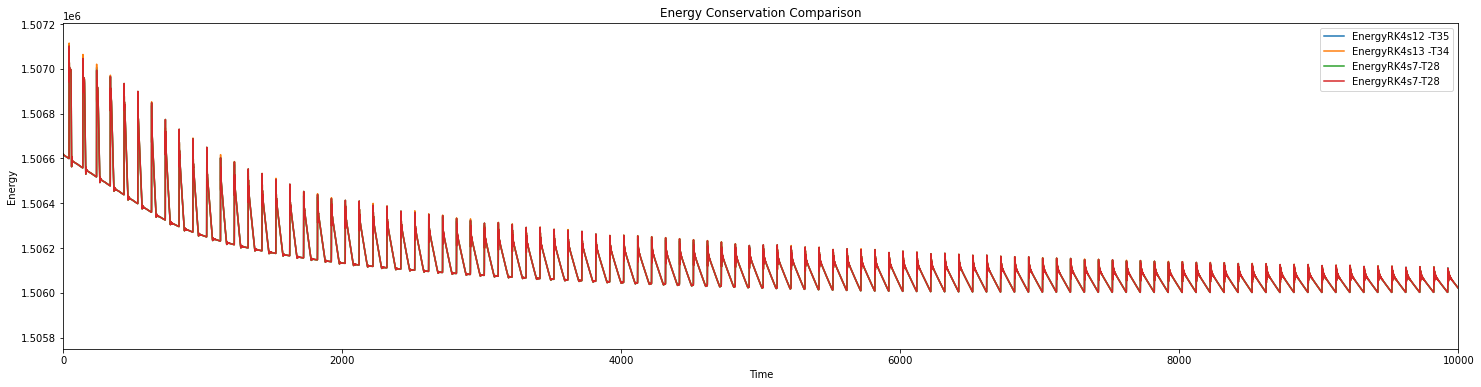

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# Read data from the first file
data2 = np.loadtxt('EnergyRK4s13 -T33.txt')

# Read data from the second file
data1 = np.loadtxt('EnergyRK4s12 -T35.txt')

# Read data from the first file
data3 = np.loadtxt('EnergyRK4s7-T28.txt')

# Read data from the first file
data4 = np.loadtxt('EnergyRK4s14 -T32.txt')

# Separate the data from the first file into x1 and y1 arrays
x1 = data1[:, 0]
y1 = data1[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x2 = data2[:, 0]
y2 = data2[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x3 = data3[1:, 0]
y3 = data3[1:, 1]

# Separate the data from the second file into x2 and y2 arrays
x4 = data3[1:, 0]
y4 = data3[1:, 1]

# Set the figure size
plt.figure(figsize=(25, 6))  # Adjust the width (15) and height (6) as needed

# Plot the data from the first file
plt.plot(x1,y1, label='EnergyRK4s12 -T35')

# Plot the data from the second file
plt.plot(x2,y2, label='EnergyRK4s13 -T34')

# Plot the data from the second file
plt.plot(x3,y3, label='EnergyRK4s7-T28')

# Plot the data from the second file
plt.plot(x4,y4, label='EnergyRK4s7-T28')

plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation Comparison')

# Set the y-axis limits
#plt.ylim(min(y1.min(), y2.min()), max(y1.max(), y2.max()))

plt.ylim(1505750, 1507206)

#plt.xlim(x.min(), x.max())
plt.xlim(0, 10000)

#plt.ylim(1506450, 1506806)
#plt.xlim(-10, 10)

#plt.ylim(-10, 10)
#plt.xlim(-10, 10)

plt.legend()
plt.show()

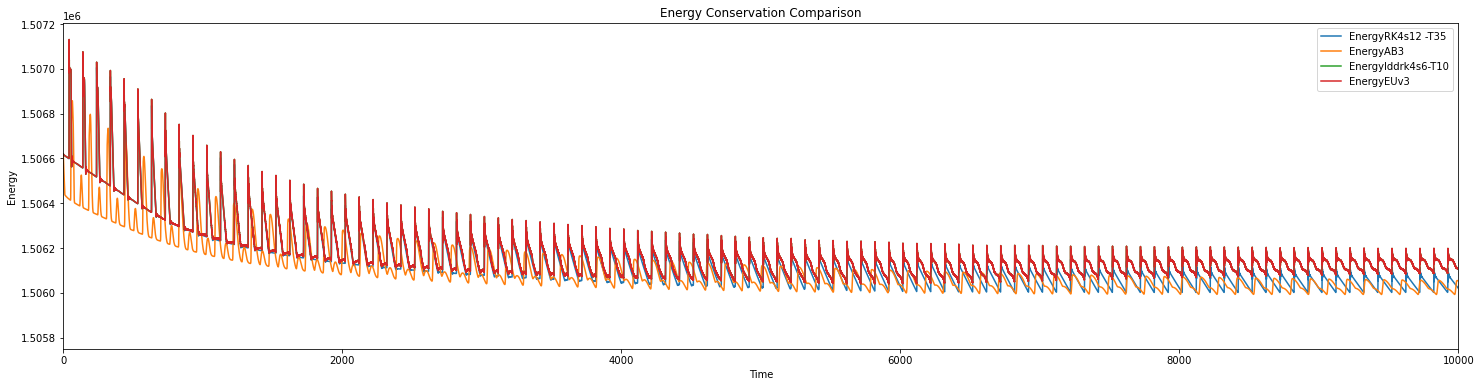

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Read data from the first file
data2 = np.loadtxt('EnergyAB3.txt')

# Read data from the second file
data1 = np.loadtxt('EnergyRK4s12 -T35.txt')

# Read data from the first file
data3 = np.loadtxt('Energylddrk4s6-T10.txt')

# Read data from the first file
data4 = np.loadtxt('EnergyEUv3.txt')

# Separate the data from the first file into x1 and y1 arrays
x1 = data1[:, 0]
y1 = data1[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x2 = data2[:, 0]
y2 = data2[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x3 = data3[1:, 0]
y3 = data3[1:, 1]

# Separate the data from the second file into x2 and y2 arrays
x4 = data3[1:, 0]
y4 = data3[1:, 1]

# Set the figure size
plt.figure(figsize=(25, 6))  # Adjust the width (15) and height (6) as needed

# Plot the data from the first file
plt.plot(x1,y1, label='EnergyRK4s12 -T35')

# Plot the data from the second file
plt.plot(x2,y2, label='EnergyAB3')

# Plot the data from the second file
plt.plot(x3,y3, label='Energylddrk4s6-T10')

# Plot the data from the second file
plt.plot(x4,y4, label='EnergyEUv3')

plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation Comparison')

# Set the y-axis limits
#plt.ylim(min(y1.min(), y2.min()), max(y1.max(), y2.max()))

plt.ylim(1505750, 1507206)

#plt.xlim(x.min(), x.max())
plt.xlim(0, 10000)

#plt.ylim(1506450, 1506806)
#plt.xlim(-10, 10)

#plt.ylim(-10, 10)
#plt.xlim(-10, 10)

plt.legend()
plt.show()

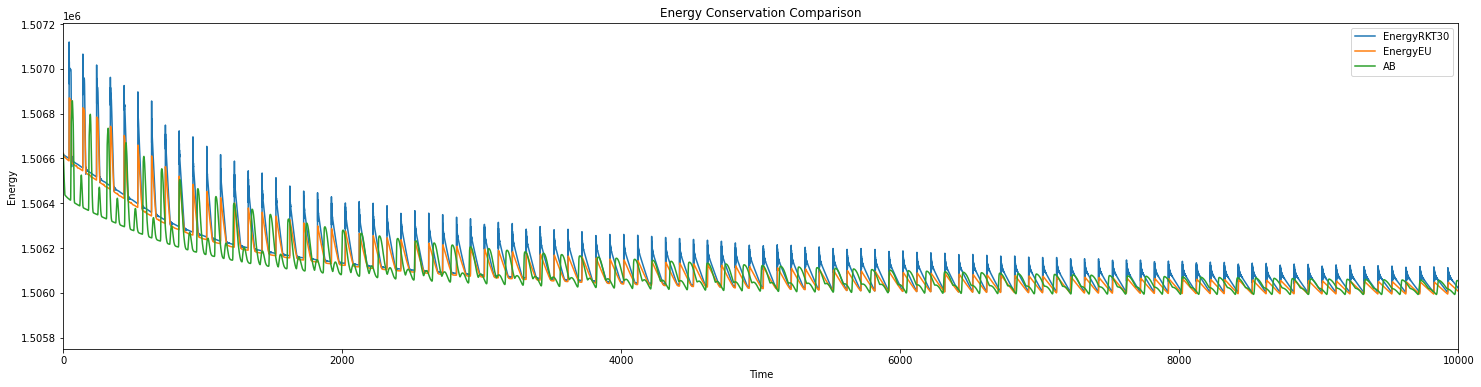

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Read data from the first file
data2 = np.loadtxt('EnergyEUv4-conInicial.txt')

# Read data from the second file
data1 = np.loadtxt('EnergyRKT30v2-conInicial.txt')

# Read data from the first file
data3 = np.loadtxt('EnergyAB3.txt')

# Separate the data from the first file into x1 and y1 arrays
x1 = data1[:, 0]
y1 = data1[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x2 = data2[:, 0]
y2 = data2[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x3 = data3[1:, 0]
y3 = data3[1:, 1]

# Set the figure size
plt.figure(figsize=(25, 6))  # Adjust the width (15) and height (6) as needed

# Plot the data from the first file
plt.plot(x1,y1, label='EnergyRKT30')

# Plot the data from the second file
plt.plot(x2,y2, label='EnergyEU')

# Plot the data from the second file
plt.plot(x3,y3, label='AB')

plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation Comparison')

# Set the y-axis limits
#plt.ylim(min(y1.min(), y2.min()), max(y1.max(), y2.max()))

plt.ylim(1505750, 1507206)
#plt.ylim(0, 1607206)
#plt.xlim(x.min(), x.max())
plt.xlim(0, 10000)

#plt.ylim(1506450, 1506806)
#plt.xlim(-10, 10)

#plt.ylim(-10, 10)
#plt.xlim(-10, 10)

plt.legend()
plt.show()

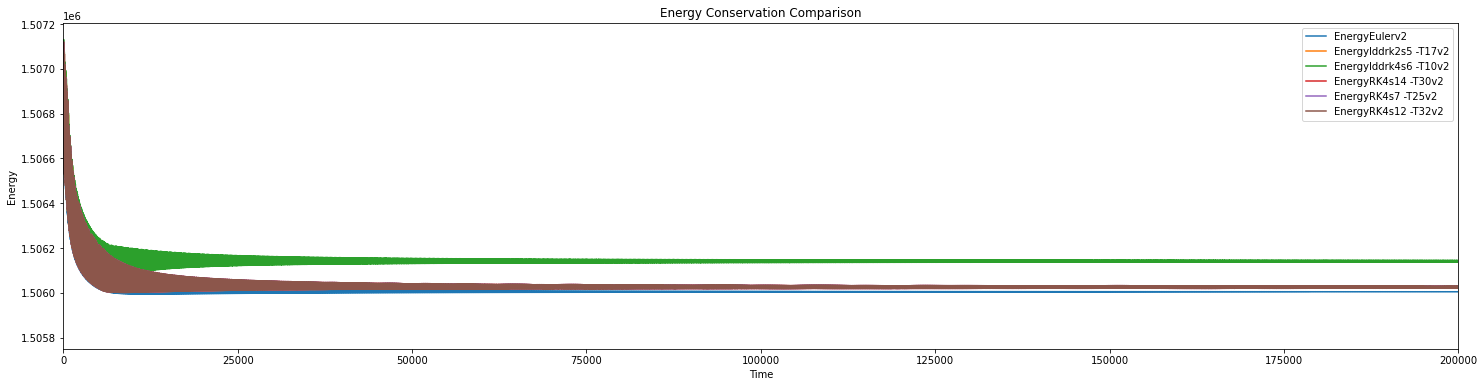

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Read data from the first file
data2 = np.loadtxt('Energylddrk2s5 -T17v2.txt')

# Read data from the second file
#data1 = np.loadtxt('EnergyRKT30v2-conInicial.txt')
data1 = np.loadtxt('EnergyEulerv2.txt')

# Read data from the first file
data3 = np.loadtxt('Energylddrk4s6 -T10v2.txt')

# Read data from the first file
data4 = np.loadtxt('EnergyRK4s14 -T30v2.txt')

# Read data from the first file
data5 = np.loadtxt('EnergyRK4s7 -T25v2.txt')

# Read data from the first file
data6 = np.loadtxt('EnergyRK4s12 -T32v2.txt')

# Separate the data from the first file into x1 and y1 arrays
x1 = data1[:, 0]
y1 = data1[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x2 = data2[:, 0]
y2 = data2[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x3 = data3[1:, 0]
y3 = data3[1:, 1]

# Separate the data from the second file into x2 and y2 arrays
x4 = data4[1:, 0]
y4 = data4[1:, 1]

# Separate the data from the second file into x2 and y2 arrays
x5 = data4[1:, 0]
y5 = data4[1:, 1]

# Separate the data from the second file into x2 and y2 arrays
x6 = data4[1:, 0]
y6 = data4[1:, 1]

# Set the figure size
plt.figure(figsize=(25, 6))  # Adjust the width (15) and height (6) as needed

 

# Plot the data from the first file
plt.plot(x1,y1, label='EnergyEulerv2')

# Plot the data from the second file
plt.plot(x2,y2, label='Energylddrk2s5 -T17v2')


# Plot the data from the second file
plt.plot(x3,y3, label='Energylddrk4s6 -T10v2')

# Plot the data from the second file
plt.plot(x4,y4, label='EnergyRK4s14 -T30v2')

# Plot the data from the second file
plt.plot(x5,y5, label='EnergyRK4s7 -T25v2')

# Plot the data from the second file
plt.plot(x6,y6, label='EnergyRK4s12 -T32v2')

plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation Comparison')

# Set the y-axis limits
#plt.ylim(min(y1.min(), y2.min()), max(y1.max(), y2.max()))

plt.ylim(1505750, 1507206)
#plt.ylim(0, 1607206)
#plt.xlim(x.min(), x.max())
plt.xlim(0, 200000)

#plt.ylim(1506450, 1506806)
#plt.xlim(-10, 10)

#plt.ylim(-10, 10)
#plt.xlim(-10, 10)

plt.legend()
plt.show()

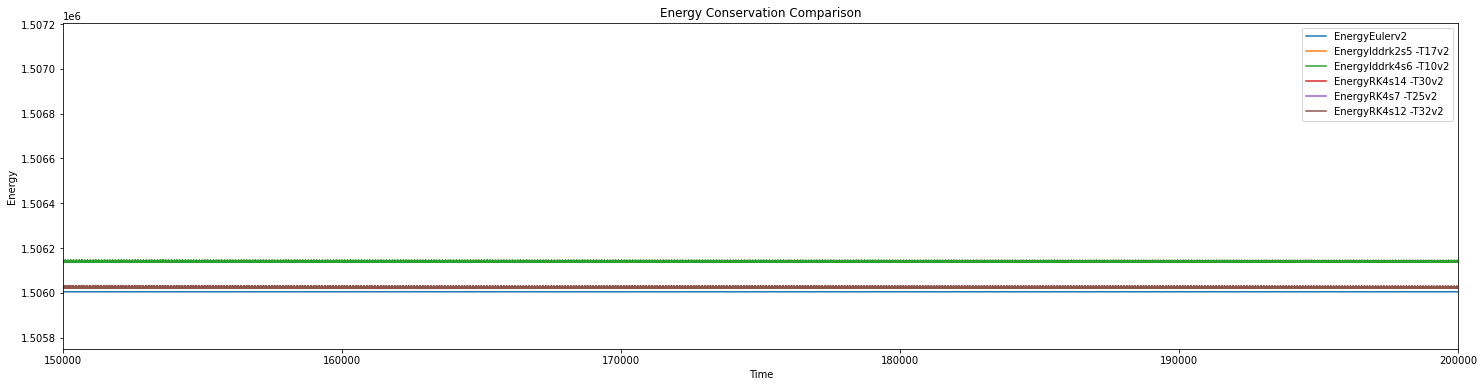

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Read data from the first file
data2 = np.loadtxt('Energylddrk2s5 -T17v2.txt')

# Read data from the second file
#data1 = np.loadtxt('EnergyRKT30v2-conInicial.txt')
data1 = np.loadtxt('EnergyEulerv2.txt')

# Read data from the first file
data3 = np.loadtxt('Energylddrk4s6 -T10v2.txt')

# Read data from the first file
data4 = np.loadtxt('EnergyRK4s14 -T30v2.txt')

# Read data from the first file
data5 = np.loadtxt('EnergyRK4s7 -T25v2.txt')

# Read data from the first file
data6 = np.loadtxt('EnergyRK4s12 -T32v2.txt')

# Separate the data from the first file into x1 and y1 arrays
x1 = data1[:, 0]
y1 = data1[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x2 = data2[:, 0]
y2 = data2[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x3 = data3[1:, 0]
y3 = data3[1:, 1]

# Separate the data from the second file into x2 and y2 arrays
x4 = data4[1:, 0]
y4 = data4[1:, 1]

# Separate the data from the second file into x2 and y2 arrays
x5 = data4[1:, 0]
y5 = data4[1:, 1]

# Separate the data from the second file into x2 and y2 arrays
x6 = data4[1:, 0]
y6 = data4[1:, 1]

# Set the figure size
plt.figure(figsize=(25, 6))  # Adjust the width (15) and height (6) as needed

 

# Plot the data from the first file
plt.plot(x1,y1, label='EnergyEulerv2')

# Plot the data from the second file
plt.plot(x2,y2, label='Energylddrk2s5 -T17v2')


# Plot the data from the second file
plt.plot(x3,y3, label='Energylddrk4s6 -T10v2')

# Plot the data from the second file
plt.plot(x4,y4, label='EnergyRK4s14 -T30v2')

# Plot the data from the second file
plt.plot(x5,y5, label='EnergyRK4s7 -T25v2')

# Plot the data from the second file
plt.plot(x6,y6, label='EnergyRK4s12 -T32v2')

plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation Comparison')

# Set the y-axis limits
#plt.ylim(min(y1.min(), y2.min()), max(y1.max(), y2.max()))

plt.ylim(1505750, 1507206)
#plt.ylim(0, 1607206)
#plt.xlim(x.min(), x.max())
plt.xlim(150000, 200000)

#plt.ylim(1506450, 1506806)
#plt.xlim(-10, 10)

#plt.ylim(-10, 10)
#plt.xlim(-10, 10)

plt.legend()
plt.show()

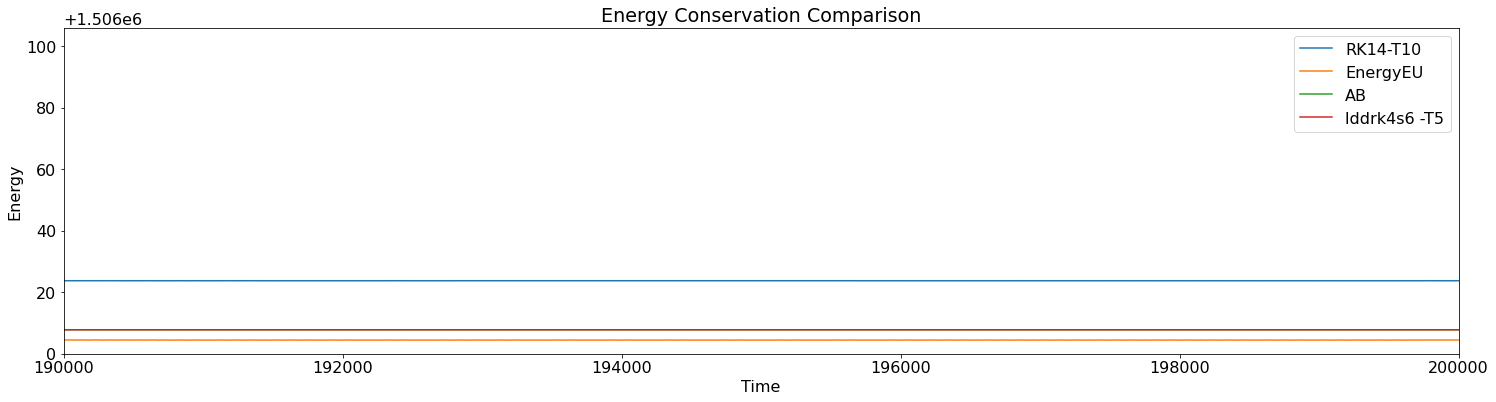

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage ##

#filter
def running_mean(a,WSZ):
	'''
	Smoothes a 1-D numpy array.
	
	WSZ: smoothing window size needs, which must be odd number,
	as in the original MATLAB implementation.

	https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
	'''
	return ndimage.uniform_filter1d(a, WSZ)


#

# Read data from the first file
data2 = np.loadtxt('EnergyEulerv2.txt')

# Read data from the second file
data1 = np.loadtxt('EnergyRK4s14 -T30v2.txt')

# Read data from the first file
data3 = np.loadtxt('EnergyAB-T2v2.txt')

# Read data from the first file
data4 = np.loadtxt('Energylddrk4s6 -T8v2.txt')

# Separate the data from the first file into x1 and y1 arrays
x1 = data1[:, 0]
y1 = data1[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x2 = data2[:, 0]
y2 = data2[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x3 = data3[1:, 0]
y3 = data3[1:, 1]

# Separate the data from the second file into x2 and y2 arrays
x4 = data3[1:, 0]
y4 = data3[1:, 1]

# Set the figure size
plt.figure(figsize=(25, 6))  # Adjust the width (25) and height (6) as needed

# Set the font size for labels and ticks
plt.rcParams.update({'font.size': 16})

# Plot the data from the first file
plt.plot(x1, running_mean(y1,5601), label='RK14-T10')

# Plot the data from the second file
plt.plot(x2, running_mean(y2,5601), label='EnergyEU')

# Plot the data from the second file
plt.plot(x3, running_mean(y3,5601), label='AB')

# Plot the data from the second file
plt.plot(x4, running_mean(y4,7601), label='lddrk4s6 -T5')

plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation Comparison')

# Set the y-axis limits
#plt.ylim(1505750, 1507206)
plt.ylim(1506000, 1506106)
plt.xlim(190000, 200000)

plt.legend()
plt.show()

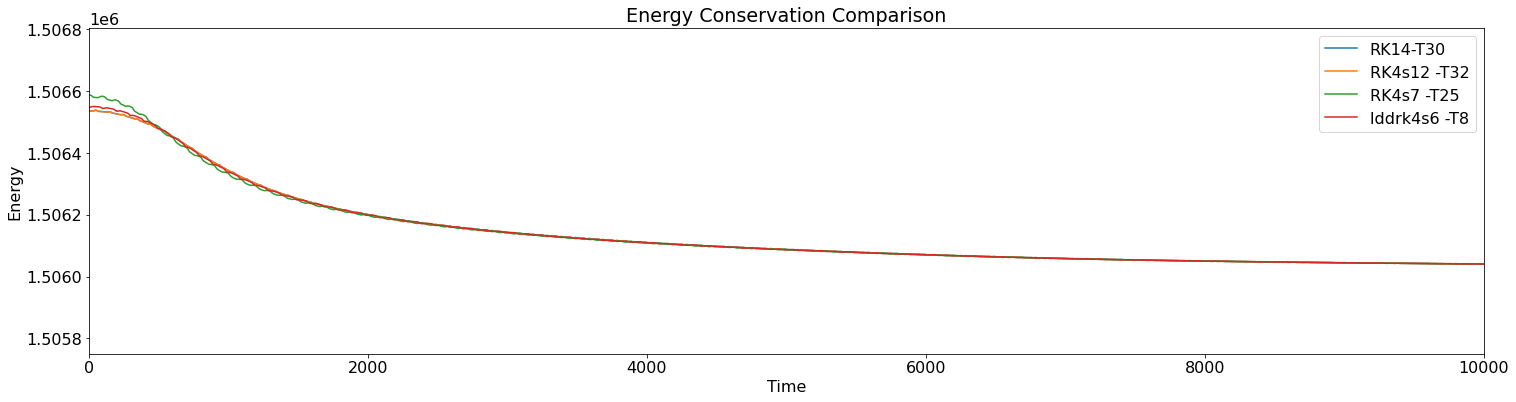

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage ##

#filter
def running_mean(a,WSZ):
	'''
	Smoothes a 1-D numpy array.
	
	WSZ: smoothing window size needs, which must be odd number,
	as in the original MATLAB implementation.

	https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
	'''
	return ndimage.uniform_filter1d(a, WSZ)


#

# Read data from the first file
data2 = np.loadtxt('EnergyRK4s12 -T32v2.txt')

# Read data from the second file
data1 = np.loadtxt('EnergyRK4s14 -T30v2.txt')

# Read data from the first file
data3 = np.loadtxt('EnergyRK4s7 -T25v2.txt')

# Read data from the first file
data4 = np.loadtxt('Energylddrk4s6 -T8v2.txt')

# Separate the data from the first file into x1 and y1 arrays
x1 = data1[:, 0]
y1 = data1[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x2 = data2[:, 0]
y2 = data2[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x3 = data3[1:, 0]
y3 = data3[1:, 1]

# Separate the data from the second file into x2 and y2 arrays
x4 = data3[1:, 0]
y4 = data3[1:, 1]

# Set the figure size
plt.figure(figsize=(25, 6))  # Adjust the width (25) and height (6) as needed

# Set the font size for labels and ticks
plt.rcParams.update({'font.size': 16})

# Plot the data from the first file
plt.plot(x1, running_mean(y1,5601), label='RK14-T30')

# Plot the data from the second file
plt.plot(x2, running_mean(y2,5601), label='RK4s12 -T32')

# Plot the data from the second file
plt.plot(x3, running_mean(y3,5601), label='RK4s7 -T25')

# Plot the data from the second file
plt.plot(x4, running_mean(y4,7601), label='lddrk4s6 -T8')

plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation Comparison')

# Set the y-axis limits
plt.ylim(1505750, 1506806)
plt.xlim(0, 10000)

plt.legend()
plt.show()

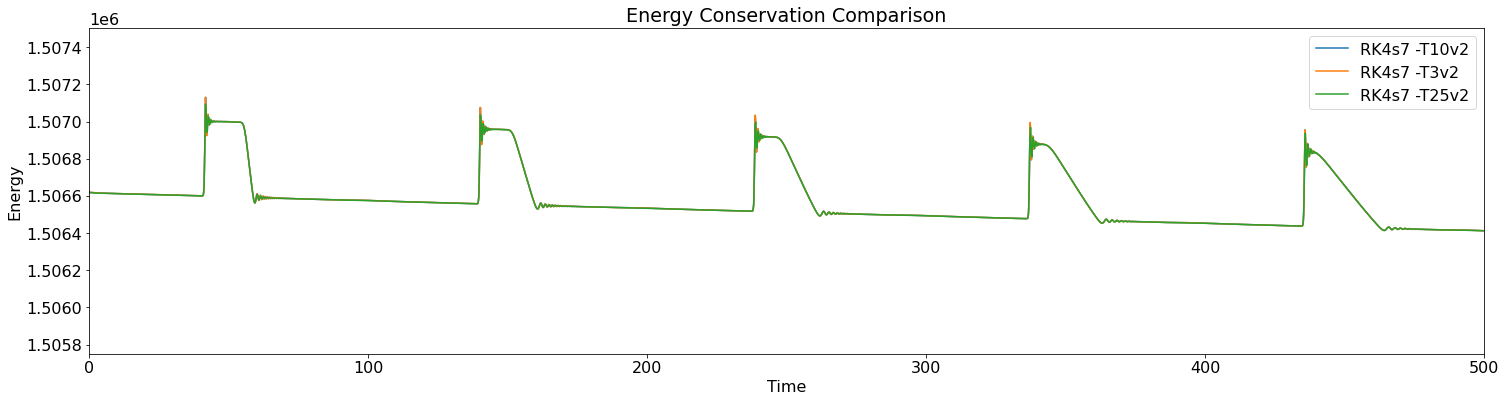

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Read data from the first file
data2 = np.loadtxt('EnergyRK4s7 -T3v2.txt')

# Read data from the second file
data1 = np.loadtxt('EnergyRK4s7 -T10v2.txt')

# Read data from the first file
data3 = np.loadtxt('EnergyRK4s7 -T25v2.txt')



# Separate the data from the first file into x1 and y1 arrays
x1 = data1[:, 0]
y1 = data1[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x2 = data2[:, 0]
y2 = data2[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x3 = data3[1:, 0]
y3 = data3[1:, 1]



# Set the figure size
plt.figure(figsize=(25, 6))  # Adjust the width (25) and height (6) as needed

# Set the font size for labels and ticks
plt.rcParams.update({'font.size': 16})

# Plot the data from the first file
plt.plot(x1,y1, label='RK4s7 -T10v2')

# Plot the data from the second file
plt.plot(x2,y2, label='RK4s7 -T3v2')

# Plot the data from the second file
plt.plot(x3, y3, label='RK4s7 -T25v2')



plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation Comparison')

# Set the y-axis limits
plt.ylim(1505750, 1507506)
plt.xlim(0, 500)

plt.legend()
plt.show()

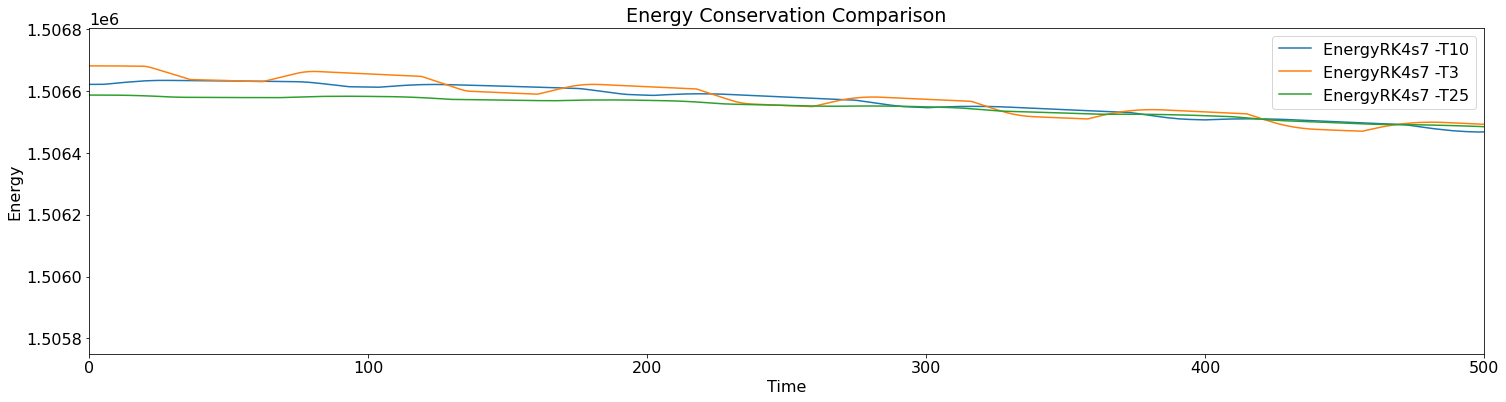

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage ##

#filter
def running_mean(a,WSZ):
	'''
	Smoothes a 1-D numpy array.
	
	WSZ: smoothing window size needs, which must be odd number,
	as in the original MATLAB implementation.

	https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
	'''
	return ndimage.uniform_filter1d(a, WSZ)


#

# Read data from the first file
data2 = np.loadtxt('EnergyRK4s7 -T3v2.txt')

# Read data from the second file
data1 = np.loadtxt('EnergyRK4s7 -T10v2.txt')

# Read data from the first file
data3 = np.loadtxt('EnergyRK4s7 -T25v2.txt')



# Separate the data from the first file into x1 and y1 arrays
x1 = data1[:, 0]
y1 = data1[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x2 = data2[:, 0]
y2 = data2[:, 1]

# Separate the data from the second file into x2 and y2 arrays
x3 = data3[1:, 0]
y3 = data3[1:, 1]


# Set the figure size
plt.figure(figsize=(25, 6))  # Adjust the width (25) and height (6) as needed

# Set the font size for labels and ticks
plt.rcParams.update({'font.size': 16})

# Plot the data from the first file
plt.plot(x1, running_mean(y1,5601), label='EnergyRK4s7 -T10')

# Plot the data from the second file
plt.plot(x2, running_mean(y2,5601), label='EnergyRK4s7 -T3')

# Plot the data from the second file
plt.plot(x3, running_mean(y3,5601), label='EnergyRK4s7 -T25')


plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation Comparison')

# Set the y-axis limits
plt.ylim(1505750, 1506806)
plt.xlim(0, 500)

plt.legend()
plt.show()